In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

In [63]:
# Step 1: Identify binary and continuous columns
binary_cols = [col for col in df.columns if sorted(df[col].dropna().unique()) == [0, 1]]
continuous_cols = [col for col in df.columns if col not in binary_cols]
# Step 2: Calculate Q1, Q2, Q3, IQR only for continuous columns
Q1 = df[continuous_cols].quantile(0.25)
Q2 = df[continuous_cols].quantile(0.50)  # Median
Q3 = df[continuous_cols].quantile(0.75)
IQR = Q3 - Q1

# Step 3: Remove outliers for continuous columns only
# (Binary columns are untouched)
filter_condition = ~((df[continuous_cols] < (Q1 - IQR)) | (df[continuous_cols] > (Q3 + IQR))).any(axis=1)
df_clean = df[filter_condition]

print("\nOriginal shape:", df.shape)
print("Cleaned shape:", df_clean.shape)



Original shape: (253680, 22)
Cleaned shape: (144834, 22)


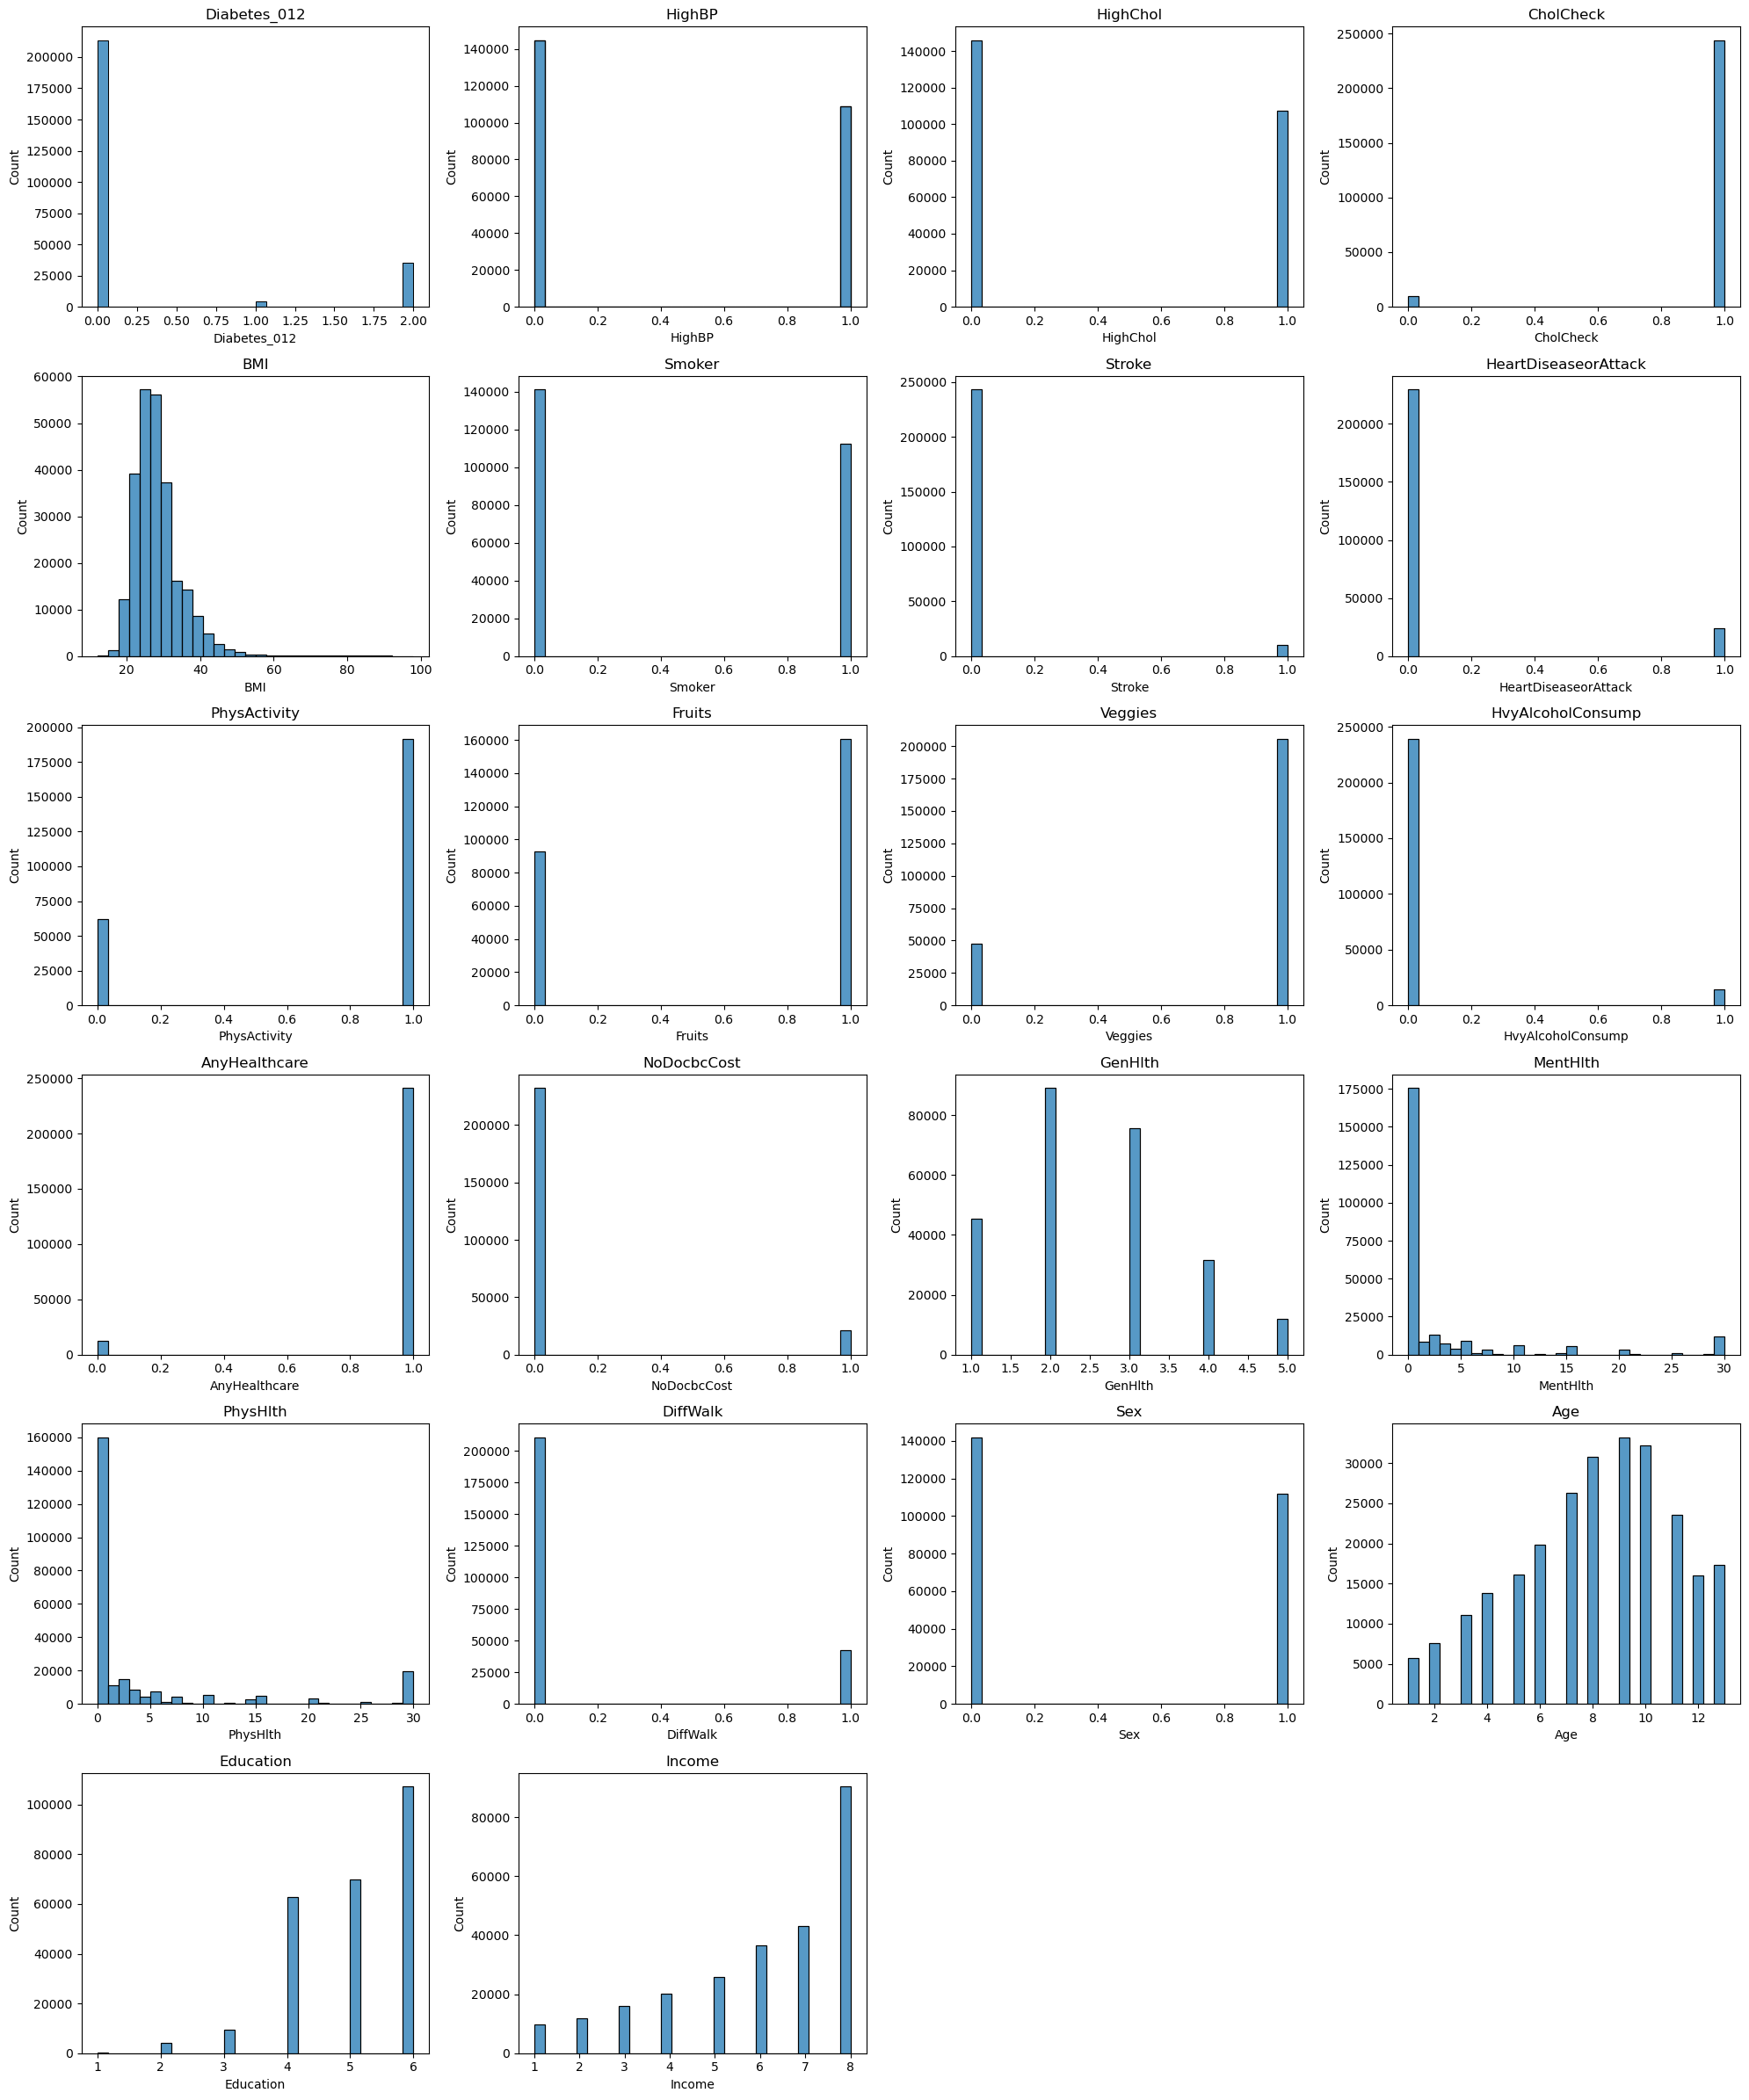

In [64]:
n_cols = 4
n_rows = (len(df.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(20, n_rows * 4))

for i, col in enumerate(df.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], bins=30, kde=False)
    plt.title(col)
    
    # plt.subplot(n_rows, n_cols, i + 1)
    # sns.histplot(df_clean[col], bins=30, kde=False)
    # plt.title(f"{col} before/after clean")
    
    plt.tight_layout()

plt.show()


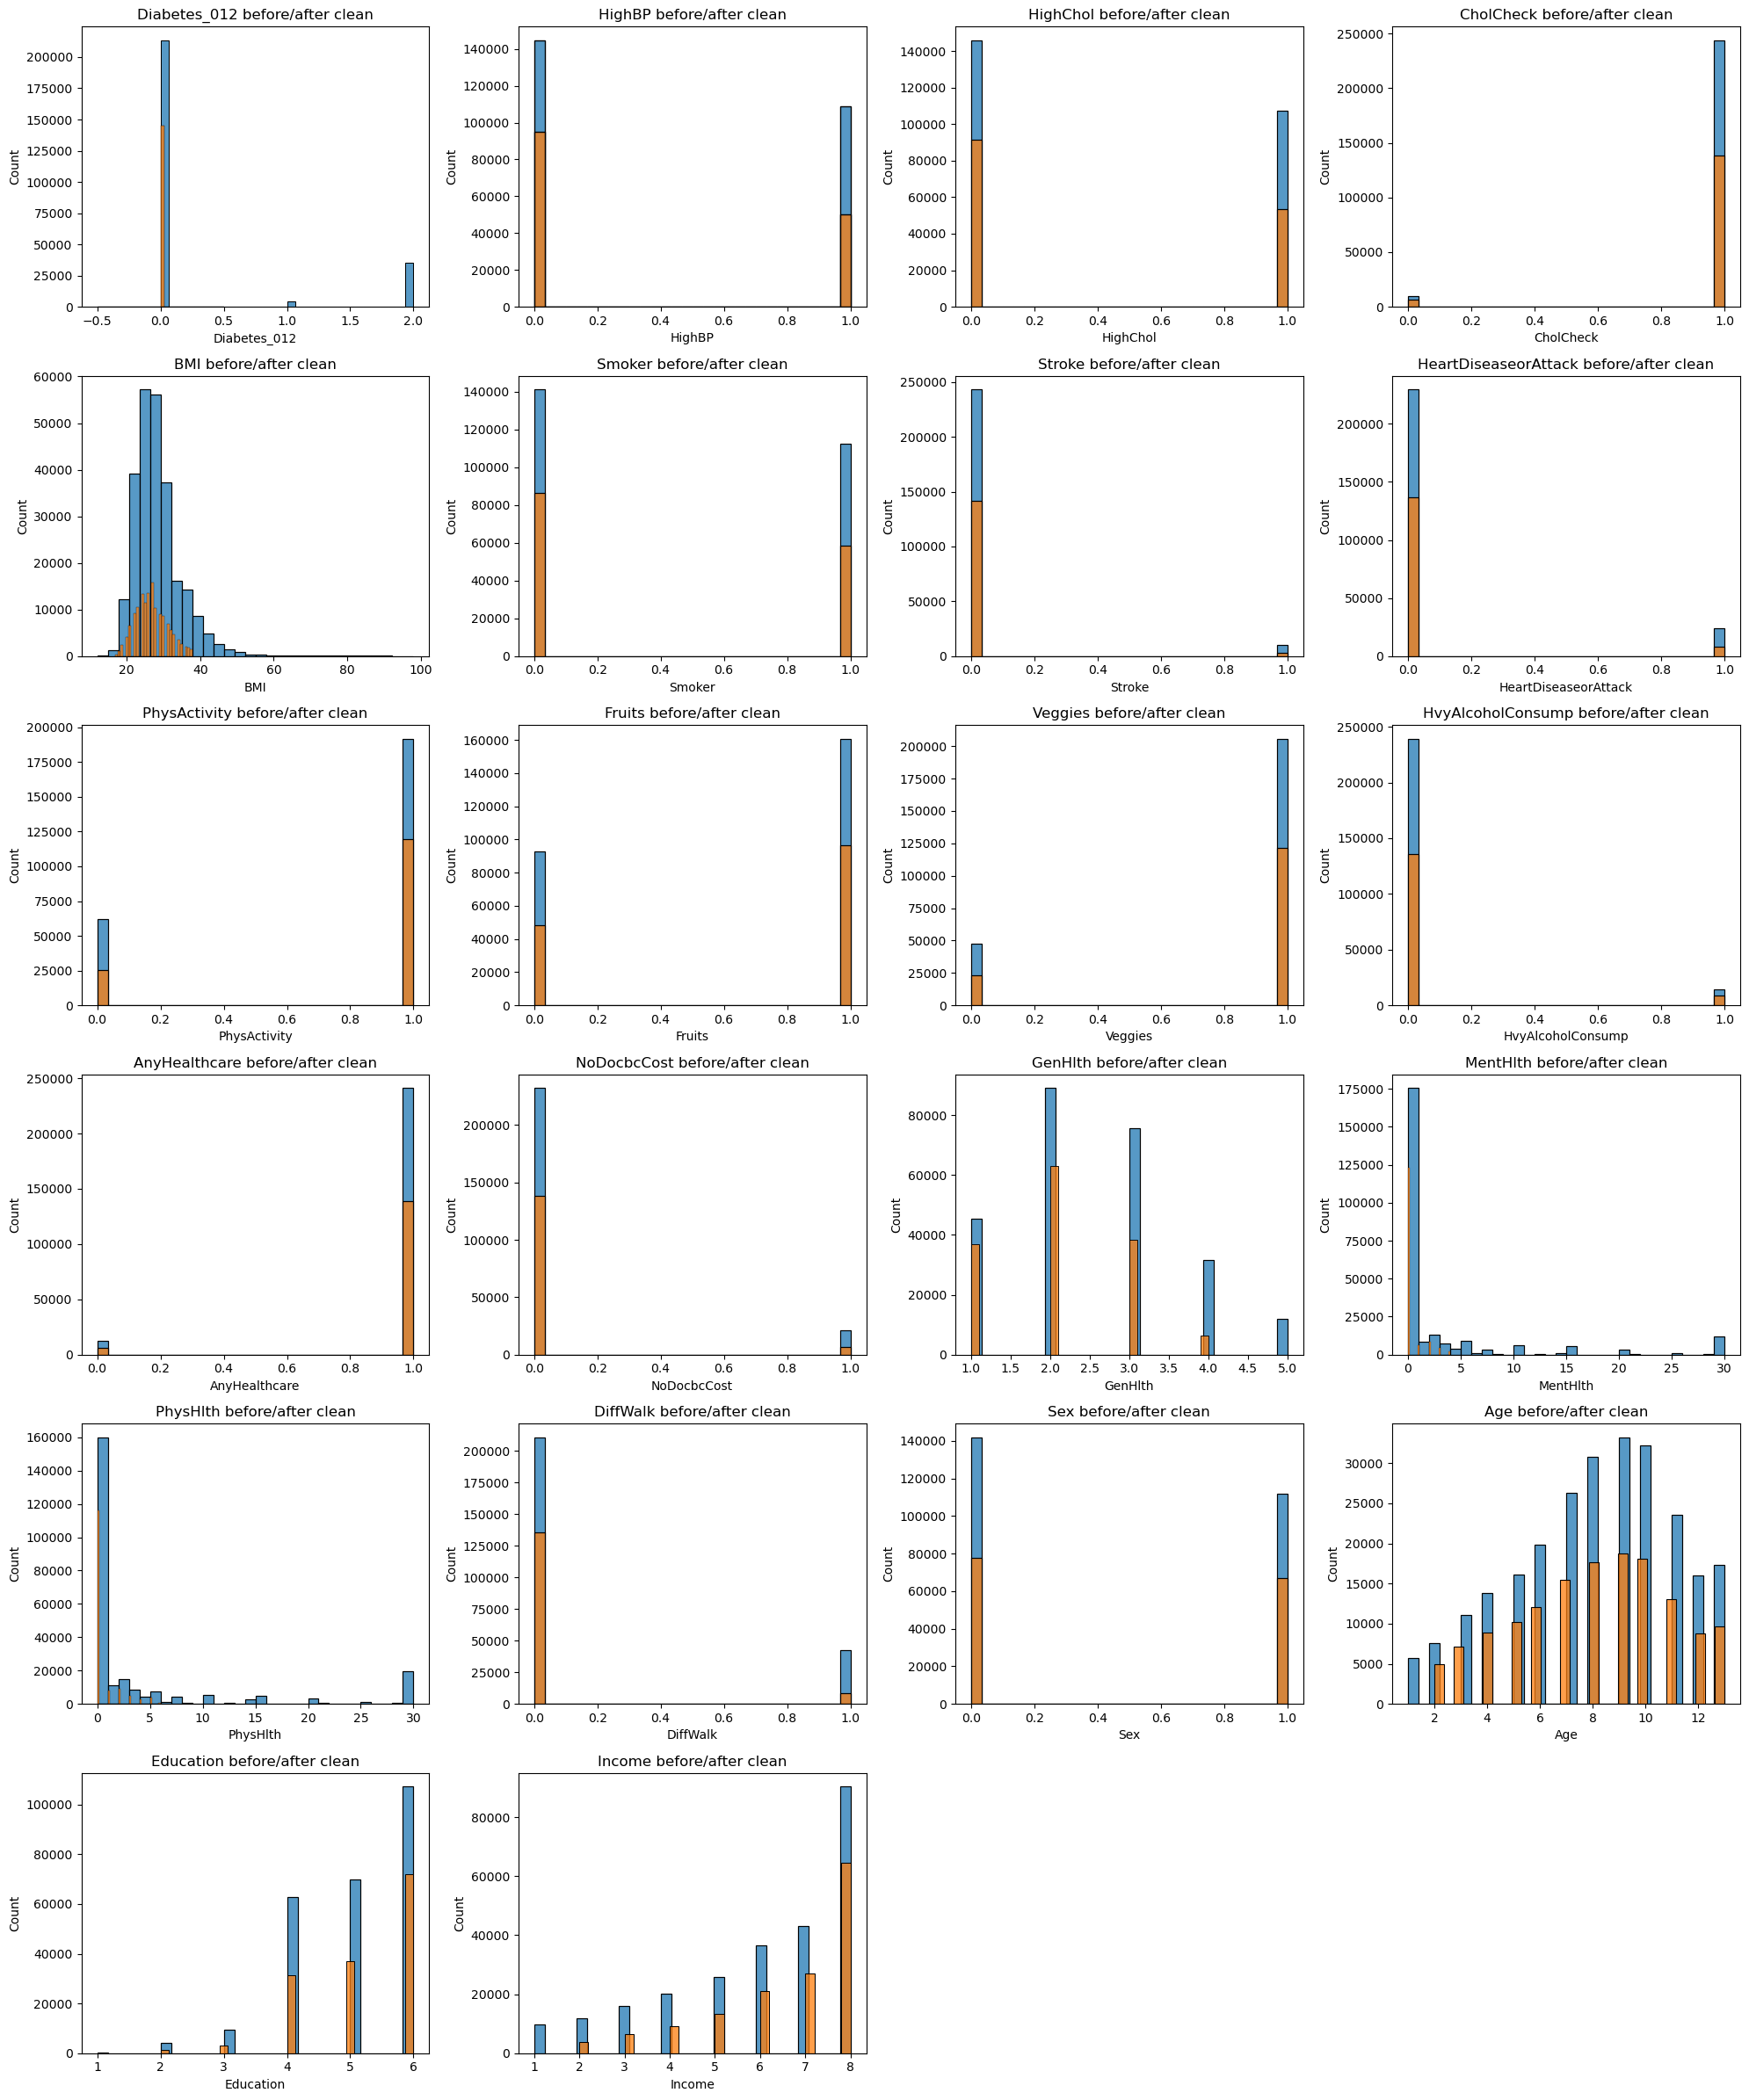

In [65]:
n_cols = 4
n_rows = (len(df.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(20, n_rows * 4))

for i, col in enumerate(df.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], bins=30, kde=False)
    plt.title(col)
    
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df_clean[col], bins=30, kde=False)
    plt.title(f"{col} before/after clean")
    
    plt.tight_layout()

plt.show()


In [96]:
# proportions of 0:1:2 diabetes
y = list(df["Diabetes_012"])
length = len(y)
print(y.count(0)/length)
print(y.count(1)/length)
print(y.count(2)/length)


# pre data cleaned model simple benchmark classification

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.metrics import accuracy_score
y = list(df["Diabetes_012"])
y = list(map(lambda X: 1 if X == 2 or X == 1 else X, y))
# print(y)
X = df.to_numpy()
X = np.delete(X, 0,1)
print(X)

min_max = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train = min_max.fit_transform(X_train)
X_test = min_max.transform(X_test)
print("0:1 proportions in the test dataset")
print(y_test.count(0)/len(y_test))
print(y_test.count(1)/len(y_test))

logistic = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = logistic.predict(X_test)

print(f"Logistic Regression accuracy: {accuracy_score(y_test, y_pred)}")
perceptron = Perceptron(random_state=0).fit(X_train, y_train)
y_pred = perceptron.predict(X_test)

print(f"Perceptron learning accuracy: {accuracy_score(y_test, y_pred)}")

# hypothesis: since the accuracy is almost the same as the 0 proportion, the model must be predicting 0s almost always as a cheating mechanism to
# have high accuracy.

# check if most of the correct predictions are for class 0.

num_correct_1 = 0
num_correct_0 = 0
for i in range(len(y_test)):
    
    if (y_test[i] == 1 and y_pred[i] ==1  ):
        num_correct_1+=1

    if (y_test[i] == 0 and y_pred[i] ==0  ):
        num_correct_0+=1

print(num_correct_1/y_test.count(1))
print(num_correct_0/y_test.count(0))



0.8424116997792495
0.018255282245348472
0.13933301797540207
[[1. 1. 1. ... 9. 4. 3.]
 [0. 0. 0. ... 7. 6. 1.]
 [1. 1. 1. ... 9. 4. 8.]
 ...
 [0. 0. 1. ... 2. 5. 2.]
 [1. 0. 1. ... 7. 5. 1.]
 [1. 1. 1. ... 9. 6. 2.]]
0:1 proportions in the test dataset
0.8432355723746452
0.15676442762535478
Logistic Regression accuracy: 0.8488489435509303
Perceptron learning accuracy: 0.8407442447177547
0.20458660229330114
0.9590111821683683
